# DSAA 5002 - Data Mining and Knowledge Discovery in Data Science
---

# Task 1 (50 marks) Data Preprocessing and Analysis

**Background: 
Assuming you are a sentiment analyst at a securities firm, your task is to assess the impact of each news article on the A-share listed companies explicitly mentioned.**

# Preliminary_Exp of Q2

---
## Exp1. High Confidence BERT Tunning


### 1.Training Sample Selection

In [17]:
import pandas as pd

annotation_final_file = 'Training_dataset/Training_set_with_final_annotation.xlsx'
annotation_final = pd.read_excel(annotation_final_file)

In [18]:
annotation_final

,NewsID,Explicit_Company,News,Confidence_Senta,Final_Sentiment,Annotation_State
0,1,建设银行,建设银行原董事长张恩照一审被判15年 本报记者 田雨 李京华 中国建设银行股份...,0.995106,0,consensus
1,3,"中国国航, 外运发展",外运发展：价值型蓝筹股补涨要求强烈 在新基金快速发行以及申购资金回流的情况下，市场总体上...,0.798077,1,consensus
2,4,胜利股份,胜利股份：稳步走强形成标准上升通道 胜利股份（000407）公司子公司填海造地2800亩...,0.978145,1,consensus
3,41,"中联重科, 柳工, 中国石化, 三一重工, 宝钢股份, 武钢股份, 保利地产, 安徽合力, ...",上证指数盘中摸高2100点 深成指距历史高点仅差400多点 证券时报记者 彭 松 ...,0.084145,1,consensus
4,46,光大证券,专家：中国经济的宏观调控明年仍需紧缩 明年中国经济的宏观调控是否应该放松？专家学者们出现了分...,0.988216,0,consensus
...,...,...,...,...,...,...
99995,1036993,中信证券,华夏和达高科REIT基础设施项目公司完成吸收合并 13日华夏和达高科REIT公告称，截至10...,0.713087,1,consensus
99996,1037004,中国银行,收评：沪指弱势震荡跌0.64% 酿酒等板块下挫 减肥药、6G概念活跃 10月13日，两市股指...,0.534962,1,consensus
99997,1037016,超声电子,超声电子：截至2023年6月底，中央汇金没有减持 每经AI快讯，有投资者在投资者互动平台提问...,0.048252,1,consensus
99998,1037026,一汽富维,一汽富维：公司尚未获得问界汽车零部件订单 每经AI快讯，有投资者在投资者互动平台提问：问界是...,0.410653,1,difference_trust_ERNIE


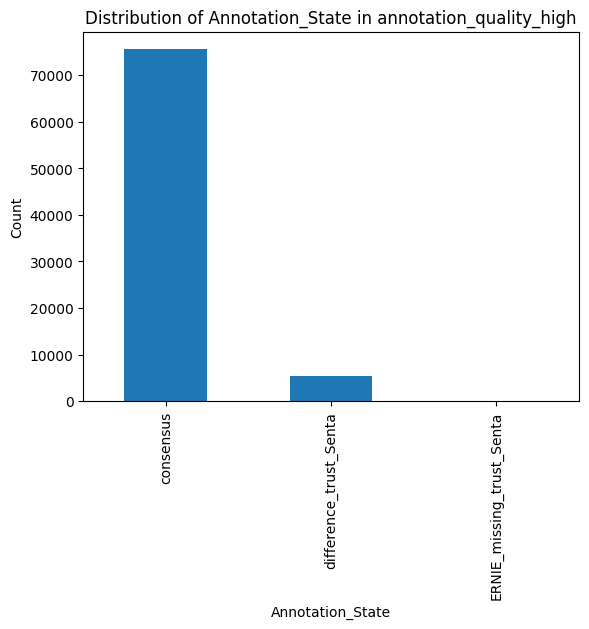

Annotation_State
consensus                    75581
difference_trust_Senta        5422
ERNIE_missing_trust_Senta       31
Name: count, dtype: int64


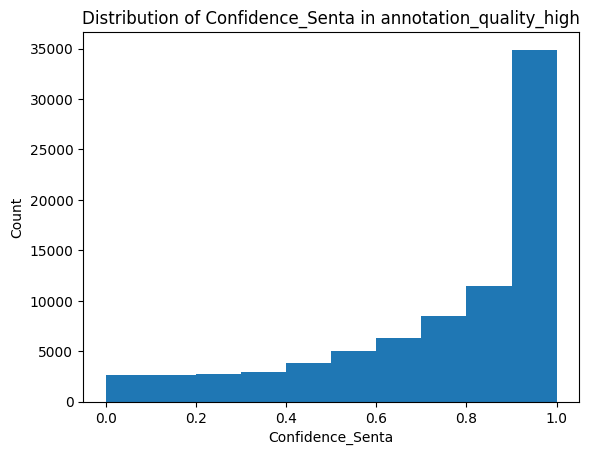

In [19]:
import matplotlib.pyplot as plt

# 1. Filter data where Annotation_State is "consensus" or Confidence_Senta is greater than 0.85, store in annotation_quality_high
annotation_quality_high = annotation_final[(annotation_final['Annotation_State'] == 'consensus') | (annotation_final['Confidence_Senta'] > 0.85)]

# Count and plot the distribution of different values in Annotation_State within annotation_quality_high
annotation_state_counts = annotation_quality_high['Annotation_State'].value_counts()
annotation_state_counts.plot(kind='bar')
plt.xlabel('Annotation_State')
plt.ylabel('Count')
plt.title('Distribution of Annotation_State in annotation_quality_high')
plt.show()

# Count 0/1/MID values
sentiment_distribution_final = annotation_quality_high['Annotation_State'].value_counts()
sentiment_distribution_final = sentiment_distribution_final
print(sentiment_distribution_final)

# Count and plot the distribution of Confidence_Senta values within annotation_quality_high
annotation_quality_high['Confidence_Senta'].plot(kind='hist')
plt.xlabel('Confidence_Senta')
plt.ylabel('Count')
plt.title('Distribution of Confidence_Senta in annotation_quality_high')
plt.show()


In [20]:
# 2. Store data with Final_Sentiment value of 0 from annotation_quality_high into annotation_quality_high_0, 
#    and data with Final_Sentiment value of 1 into annotation_quality_high_1
annotation_quality_high_0 = annotation_quality_high[annotation_quality_high['Final_Sentiment'] == 0]
annotation_quality_high_1 = annotation_quality_high[annotation_quality_high['Final_Sentiment'] == 1]


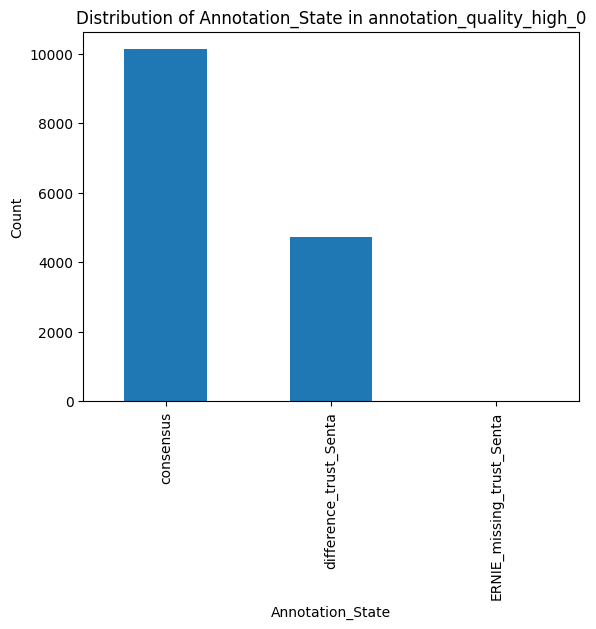

Annotation_State
consensus                    10124
difference_trust_Senta        4732
ERNIE_missing_trust_Senta        8
Name: count, dtype: int64


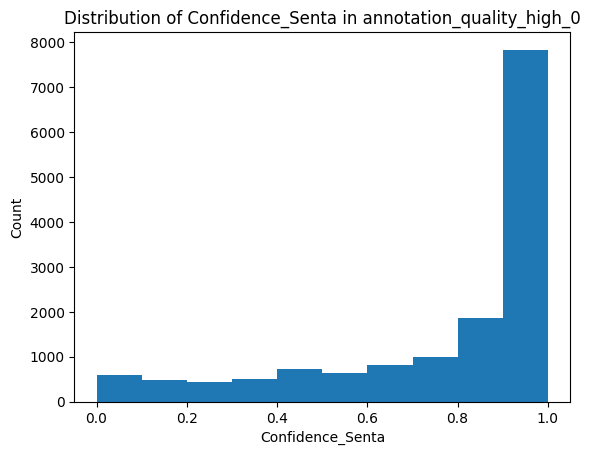

In [21]:
# Calculate and plot the distribution of Annotation_State values in annotation_quality_high_0
annotation_state_counts_0 = annotation_quality_high_0['Annotation_State'].value_counts()
annotation_state_counts_0.plot(kind='bar')
plt.xlabel('Annotation_State')
plt.ylabel('Count')
plt.title('Distribution of Annotation_State in annotation_quality_high_0')
plt.show()

# Calculate the count of 0/1/MID in annotation_quality_high_0
sentiment_distribution_final = annotation_quality_high_0['Annotation_State'].value_counts()
sentiment_distribution_final = sentiment_distribution_final
print(sentiment_distribution_final)

# Plot the distribution of Confidence_Senta values in annotation_quality_high_0
annotation_quality_high_0['Confidence_Senta'].plot(kind='hist')
plt.xlabel('Confidence_Senta')
plt.ylabel('Count')
plt.title('Distribution of Confidence_Senta in annotation_quality_high_0')
plt.show()


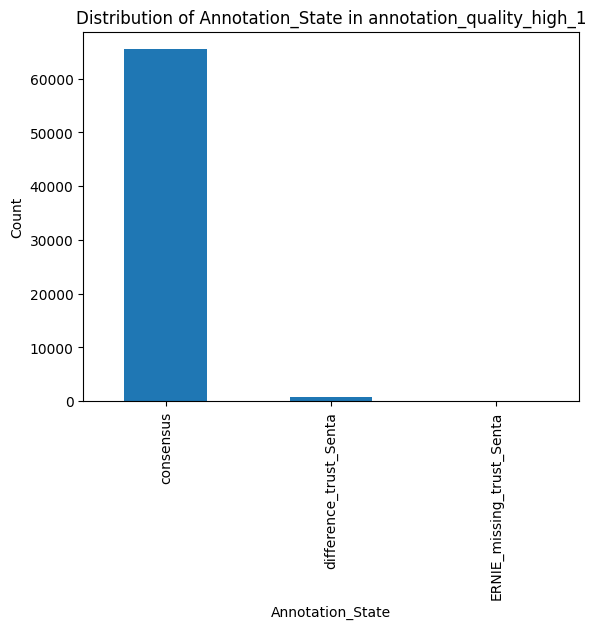

Annotation_State
consensus                    65457
difference_trust_Senta         690
ERNIE_missing_trust_Senta       23
Name: count, dtype: int64


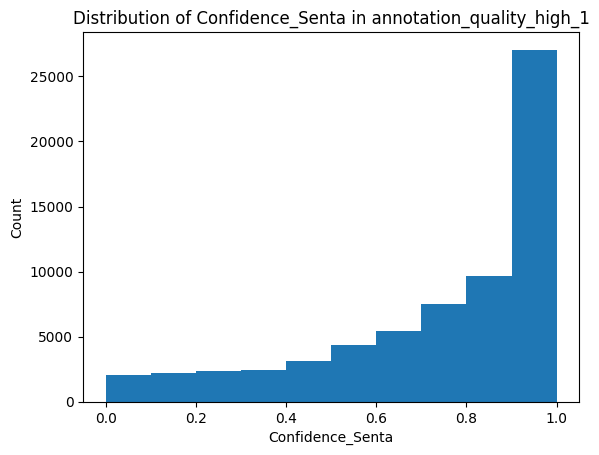

In [22]:
# Calculate and plot the distribution of Annotation_State values in annotation_quality_high_1
annotation_state_counts_1 = annotation_quality_high_1['Annotation_State'].value_counts()
annotation_state_counts_1.plot(kind='bar')
plt.xlabel('Annotation_State')
plt.ylabel('Count')
plt.title('Distribution of Annotation_State in annotation_quality_high_1')
plt.show()

# Calculate the count of 0/1/MID in annotation_quality_high_1
sentiment_distribution_final = annotation_quality_high_1['Annotation_State'].value_counts()
sentiment_distribution_final = sentiment_distribution_final
print(sentiment_distribution_final)

# Plot the distribution of Confidence_Senta values in annotation_quality_high_1
annotation_quality_high_1['Confidence_Senta'].plot(kind='hist')
plt.xlabel('Confidence_Senta')
plt.ylabel('Count')
plt.title('Distribution of Confidence_Senta in annotation_quality_high_1')
plt.show()


In [23]:
# 3. Select the top 5000 samples with the highest Confidence_Senta from annotation_quality_high_0 and annotation_quality_high_1, and add them to annotation_quality_best
annotation_quality_best = pd.concat([annotation_quality_high_0.nlargest(5000, 'Confidence_Senta'), annotation_quality_high_1.nlargest(5000, 'Confidence_Senta')])

In [24]:
annotation_quality_best

,NewsID,Explicit_Company,News,Confidence_Senta,Final_Sentiment,Annotation_State
1421,18997,新华网,涉嫌严重违纪 陕西高速集团原董事长被开除党籍 新华网西安12月16日电 （记者冯国 任珂...,0.999995,0,consensus
3257,41976,兴业银行,法兴银行欺诈案各方反应 法兴银行解释难以置信 巴黎政治科学院经济学教授科恩表示，...,0.999995,0,consensus
17195,222483,农业银行,警惕5类新型虚假信息诈骗 福建省公安厅１１月２４日公布近期频繁出现的５类新型虚假信息诈骗...,0.999995,0,difference_trust_Senta
19379,249886,人民网,屏幕脆弱不堪? 消费者批评爱国者MP5质量太差 人民网北京2月25日讯 (记者宋阳) 有...,0.999995,0,consensus
53656,605213,"南山控股, 人民网",成都南山凌峯被投诉“货不对板” 相关部门回应 近期，位于四川成都武侯区的南山凌峯被投诉，称该...,0.999995,0,consensus
...,...,...,...,...,...,...
3954,51045,兴业银行,财政部增补记账式国债承销团成员 为保障2008年度记账式国债发行工作的有序进行，财政部日...,0.994784,1,consensus
38780,460558,国轩高科,国轩高科：公司电池技术水平行业领先 磷酸铁锂方面 已拥有210Wh/kg能量密度电芯量产能力...,0.994783,1,consensus
81252,857530,人民网,人民来论：铁路建设让流动的中国释放活力 今年8月1日，也是我国第一条设计时速350公里的京津...,0.994783,1,consensus
19709,253270,科斯伍德,科斯伍德发力环保胶印油墨产业 证券时报记者 程文 科斯伍德（300192）今日招股，...,0.994780,1,consensus


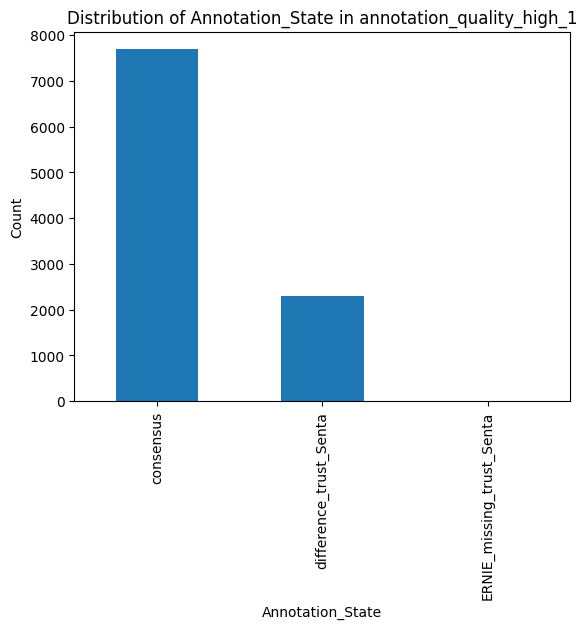

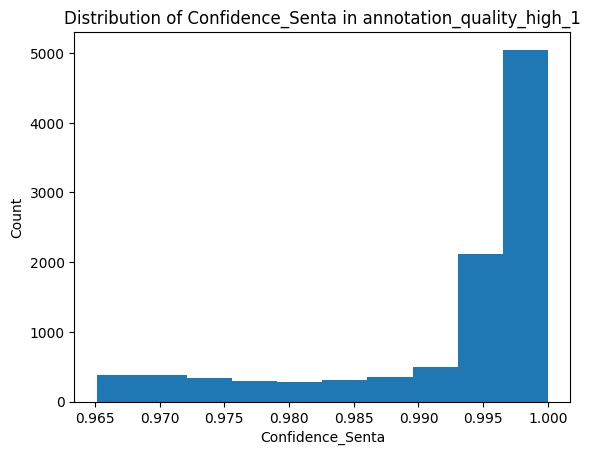

In [25]:
# Calculate and plot the distribution of different values in Annotation_State within annotation_quality_best
annotation_state_counts_1 = annotation_quality_best['Annotation_State'].value_counts()
annotation_state_counts_1.plot(kind='bar')
plt.xlabel('Annotation_State')
plt.ylabel('Count')
plt.title('Distribution of Annotation_State in annotation_quality_best')
plt.show()

# Calculate and plot the distribution of Confidence_Senta values within annotation_quality_best
annotation_quality_best['Confidence_Senta'].plot(kind='hist')
plt.xlabel('Confidence_Senta')
plt.ylabel('Count')
plt.title('Distribution of Confidence_Senta in annotation_quality_best')
plt.show()


In [26]:
annotation_quality_best.to_excel(f'Training_dataset\\Training_set_with_best_annotation.xlsx', index=False)

### 2. Model Tunning - Bert

In [27]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [28]:
# Set the paths and filenames
data_path = 'Training_dataset/Training_set_with_best_annotation.xlsx'
model_path = 'bert-base-chinese'
output_model_path = 'model.bin'

# Load the dataset
df = pd.read_excel(data_path)
news = df['News'].tolist()
labels = df['Final_Sentiment'].tolist()

from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
train_news, test_news, train_labels, test_labels = train_test_split(news, labels, test_size=0.1, random_state=42)


In [29]:
# Define a custom dataset
class NewsDataset(Dataset):
    def __init__(self, news, labels, tokenizer):
        self.news = news
        self.labels = labels
        self.tokenizer = tokenizer
    
    def __len__(self):
        return len(self.news)
    
    def __getitem__(self, idx):
        text = self.news[idx]
        label = self.labels[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=512,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }
    
# Create training dataset
tokenizer = BertTokenizer.from_pretrained(model_path)
train_dataset = NewsDataset(train_news, train_labels, tokenizer)


In [30]:
# Initialize the Bert tokenizer and model
model = BertForSequenceClassification.from_pretrained(model_path, num_labels=2)

# Define training parameters
batch_size = 10
lr = 2e-5
epochs = 10

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=lr)
loss_fn = torch.nn.CrossEntropyLoss()

# Create data loader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Train the model
model.train()
for epoch in range(epochs):
    total_loss = 0
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}', leave=False)

    for batch in progress_bar:
        input_ids = batch['input_ids'].to(model.device)
        attention_mask = batch['attention_mask'].to(model.device)
        labels = batch['labels'].to(model.device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        progress_bar.set_postfix({'loss': loss.item()})
    
    avg_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{epochs} - Average Loss: {avg_loss:.4f}')

# Save the model
model.save_pretrained(output_model_path)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10 - Average Loss: 0.0610


Epoch 2/10 - Average Loss: 0.0282


Epoch 3/10 - Average Loss: 0.0159


Epoch 4/10 - Average Loss: 0.0102


Epoch 5/10 - Average Loss: 0.0109


Epoch 6/10 - Average Loss: 0.0110


Epoch 7/10 - Average Loss: 0.0102


Epoch 8/10 - Average Loss: 0.0008


Epoch 9/10 - Average Loss: 0.0132


Epoch 10/10 - Average Loss: 0.0069


### 3. Test on test set selected by confidence

In [31]:
import torch

# Load the test dataset
test_dataset = NewsDataset(test_news, test_labels, tokenizer)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load the saved model
model = BertForSequenceClassification.from_pretrained(output_model_path)

# Test the model
model.eval()
total_correct = 0
total_samples = 0

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(model.device)
        attention_mask = batch['attention_mask'].to(model.device)
        labels = batch['labels'].to(model.device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predicted_labels = torch.max(outputs.logits, dim=1)

        total_correct += (predicted_labels == labels).sum().item()
        total_samples += labels.size(0)

accuracy = total_correct / total_samples
print(f'Test Accuracy: {accuracy:.4f}')


Test Accuracy: 0.9960


### 4. Test on test set selected randomly in training dataset¶

In [1]:
import torch

# Set the paths and file names
data_path = 'Training_dataset/Training_set_with_fianl_annotation.xlsx'
model_path = 'bert-base-chinese'
output_model_path = 'model.bin'

# Load the dataset
df = pd.read_excel(data_path)
news = df['News'].tolist()
labels = df['Final_Sentiment'].tolist()

from sklearn.model_selection import train_test_split

# Randomly load 10,000 test samples
train_news, test_news, train_labels, test_labels = train_test_split(news, labels, test_size=0.9, random_state=42)
test_dataset = NewsDataset(test_news[:10000], test_labels, tokenizer)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load the saved model
model = BertForSequenceClassification.from_pretrained(output_model_path)

# Test the model
model.eval()
total_correct = 0
total_samples = 0

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(model.device)
        attention_mask = batch['attention_mask'].to(model.device)
        labels = batch['labels'].to(model.device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predicted_labels = torch.max(outputs.logits, dim=1)

        total_correct += (predicted_labels == labels).sum().item()
        total_samples += labels.size(0)

accuracy = total_correct / total_samples
print(f'Validation Accuracy: {accuracy:.4f}')

Validation Accuracy: 0.5677


**Conclusion: Bad Generalization -> not good method**